# 参考以下链接：

版权声明：本文为CSDN博主「潜水的飞鱼baby」的原创文章，遵循 CC 4.0 BY-SA 版权协议，转载请附上原文出处链接及本声明。
原文链接：https://blog.csdn.net/u011702002/article/details/78242400

In [1]:
from __future__ import division, print_function, absolute_import #https://www.cnblogs.com/ksedz/p/3190208.html
import pyedflib

import os
import numpy as np
import matplotlib.pyplot as plt
import math

from scipy import signal

dataset_path = r"D:\shantou\edf"
filenames='20181227.edf'
edf_dir = os.path.join(dataset_path, filenames)
print(edf_dir)


def get_npyxdata_from_edf(edf_dir,channel):

    b = pyedflib.EdfReader(edf_dir)
    print("channels_in_file: %i" % b.signals_in_file)
    
    q = b.readSignal(channel)
    q = np.expand_dims(q,axis=0)
    
    b._close()
    del b
    
    return q

Nasal_Pressure = get_npyxdata_from_edf(edf_dir,13)

D:\shantou\edf\20181227.edf
channels_in_file: 22


In [2]:
print(Nasal_Pressure.shape)#(1, 36804608)
a1=Nasal_Pressure.reshape(-1,1024)
print(a1.shape)
#####################################将脑电信号做个均值，只是减少后续计算量而已####################
N_P=[]
for i in a1:
    N_P.append(sum(i[0:341])/341)
    N_P.append(sum(i[341:682])/341)
    N_P.append(sum(i[682:1024])/342)
    
N_P=np.array(N_P)
N_P=N_P.reshape(-1,3)

print(N_P.shape) 
######################################################选取其中二十分钟的数据就做个例子##########################
a2=N_P[11549:11569,:]
print(a2.shape)#20*3

(1, 36804608)
(35942, 1024)
(35942, 3)
(20, 3)


## BOLL（布林带）

### 计算方法：

### 1、计算中轨

### MB=(当前k线收盘价+前k线收盘价+...+前N-1根k线收盘价)/N   N默认为20

### 2、计算标准差

### 先计算N根K线差额的平方和

### sum=(当前K线收盘价-当前k线MB)^2+(前K线收盘价-前k线MB)^2+...+(第N根K线收盘价-第N根k线MB)^2

### 再计算标准差(Sqrt表示开方，计算平方根)

### MD=K*Sqrt(sum/N)     K为标准差值，默认值为2；N默认为20

### 3、计算上轨、下轨

### UP=MB+MD    （上轨值计算）

### DN=MB-MD    （下轨值计算）

In [3]:
a2=a2.flatten()
print(a2)
N = 20 #20日移动平均计算的布林线
#平均权重
weights = np.ones(N)/N
#卷积实现移动平均
sma = np.convolve(weights,a2)[N-1:-N+1]
#np.convolve输入数据只能一维
print(sma)
deviation = []


for i in range(N-1,len(a2)):
    dev = a2[i-N+1:i+1]
    print(dev)
    deviation.append(np.std(dev))


#两倍标准差
deviation = 2 * np.array(deviation)  
#压力线
upperBB = sma + deviation  
#支撑线
lowerBB = sma - deviation


print(deviation)
print(upperBB)
print(lowerBB)

[-0.00187538  0.07035573  0.1476877  -0.17896953 -0.11471876 -0.05468709
  0.11560029  0.40859678  0.3105327   0.22363506  0.08065131 -0.41934201
 -0.87608846 -0.60467924 -0.21023452  0.03891319  0.17731744  0.43288864
  0.61772056  0.53464167  0.27289467 -0.39604858 -0.81993795 -0.55488407
 -0.17946802  0.07870747  0.30506711  0.61952748  0.4842153   0.35581451
 -0.04088031 -0.74353276 -0.70620538 -0.2772081   0.05175762  0.17910612
  0.46313279  0.55355301  0.41571019  0.19974328 -0.55644641 -0.75902747
 -0.36423106 -0.05194914  0.13035577  0.21183684  0.4649782   0.42111688
  0.26691162  0.00368678 -0.62956583 -0.57077468 -0.1970781   0.03496725
  0.13876626  0.17273347  0.36967078  0.26721232  0.04923831 -0.01372777]
[ 0.0348973   0.04863581  0.02531559 -0.02306569 -0.04186142 -0.04509888
 -0.03842915 -0.02895581 -0.01840928 -0.00972515 -0.00311618 -0.00919276
 -0.02540229 -0.01690814 -0.00053458  0.01256502  0.01957467  0.03386544
  0.03989866  0.02979814  0.01305322 -0.02841384 -

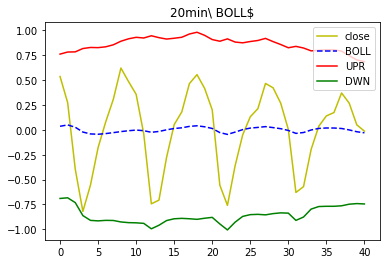

In [4]:
c_slice = a2[N-1:]

plt.plot(c_slice,'y',label = "close")
plt.plot(sma,'b--',label = "BOLL")
plt.plot(upperBB,'r',label = "UPR")
plt.plot(lowerBB,'g',label = "DWN")
plt.title('20min\ BOLL$')
plt.legend()
plt.show()
